In [62]:
import keras
import matplotlib.pyplot as plt

In [63]:
keras.backend.backend()

'tensorflow'

In [64]:
from keras.datasets import fashion_mnist, mnist

In [65]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 9s 2us/step


In [66]:
x_train.shape

(60000, 28, 28)

In [67]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [68]:
x_test.shape

(10000, 28, 28)

In [69]:
y_test.shape

(10000,)

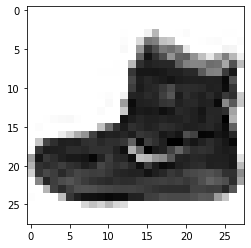

In [70]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [71]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [72]:
x_train = x_train / 255
x_test = x_test / 255

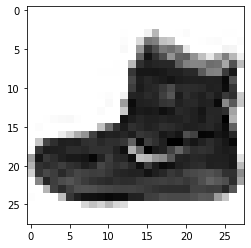

In [73]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [74]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [75]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4842 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3646 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3279 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.8873
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2876 - accuracy: 0.8924


In [79]:
model.save("number.model")

INFO:tensorflow:Assets written to: number.model\assets


In [80]:
_model = keras.models.load_model("number.model")

In [81]:
_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8561


[0.38257014751434326, 0.8561000227928162]

In [82]:
predictions = _model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


In [83]:
predictions[0]

array([1.4968026e-05, 7.9907004e-06, 1.7214854e-05, 5.3595049e-05,
       3.1072319e-05, 1.9474702e-02, 1.0664861e-04, 5.8390513e-02,
       3.9598413e-05, 9.2186373e-01], dtype=float32)

In [84]:
import numpy as np

In [89]:
np.argmax(predictions[37])

5

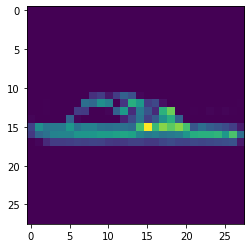

In [90]:
plt.imshow(x_test[37])